In [1]:
import numpy as np
from optiland import analysis, optic
from optiland.physical_apertures.rectangular import RectangularAperture
from optiland.analysis.irradiance import IncoherentIrradiance
from optiland.analysis.intensity import RadiantIntensity
from optiland.coordinate_system import CoordinateSystem
from optiland.materials import IdealMaterial, Material

from optiland.surfaces import Surface
from optiland.geometries import NurbsGeometry


import optiland.backend as be

In [5]:
lens = optic.Optic(name="carta")

lens.set_field_type("angle")
lens.add_field(y=0)

lens.set_aperture(aperture_type="EPD", value=80)

lens.add_wavelength(value=0.587, is_primary=True)
val = 25
bar=RectangularAperture(
    y_max=val,
    y_min=-val,
    x_max=1,
    x_min=-1,
)
#lens.add_surface(index=0, radius=np.inf, thickness=np.inf)
lens.add_surface(index=0, z=-175, y=10, aperture=bar)
lens.add_surface(index=1, z=-100, aperture=bar)
#lens.add_surface(index=2, z=100, radius_y=200,radius_x=np.inf, material="mirror", rx=np.radians(-30), surface_type="toroidal", is_stop=True)


cs = CoordinateSystem(x=0, y=-15, z=100, rx=np.radians(-30), ry=0, rz=0, reference_cs=None)
nurbs_geo = NurbsGeometry(
    coordinate_system=cs,
    radius = 250,
    nurbs_norm_x = 100,
    nurbs_norm_y = 100,
    n_points_u = 2,
    n_points_v = 16,
)

material_post = IdealMaterial(n=1)
new_surface = Surface(is_stop=True, geometry=nurbs_geo, material_post=material_post, previous_surface=lens.surface_group.surfaces[1])
new_surface.interaction_model.is_reflective = True
lens.add_surface(index=2, new_surface=new_surface, z=100, rx=np.radians(-30))

carta_aperture = RectangularAperture(
    y_max=600,
    y_min=-600,
    x_max=50,
    x_min=-50,
)
lens.add_surface(index=3, z=-100, y=-650, aperture=carta_aperture)
#lens.surface_group.surfaces[1].aperture = aperture
#lens.surface_group.surfaces[2].aperture = carta_aperture


(<Figure size 1000x400 with 1 Axes>, <Axes: xlabel='Z [mm]', ylabel='Y [mm]'>)

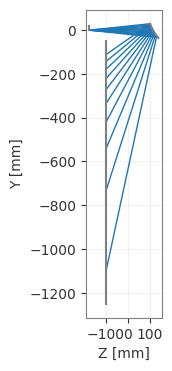

In [6]:
lens.draw(num_rays=11, projection="YZ")

(<Figure size 1000x400 with 1 Axes>, <Axes: xlabel='Z [mm]', ylabel='Y [mm]'>)

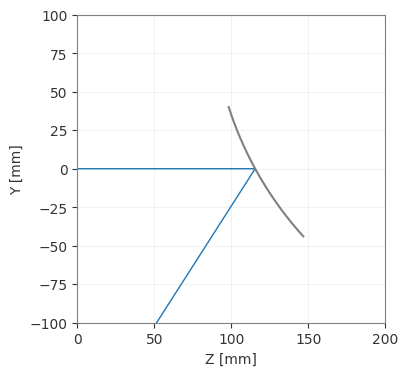

In [129]:
lens.draw(xlim=[0,200], ylim=[-100,100], projection="YZ")

[-280.         -100.           98.33211176 -100.        ]
[  40.           40.           40.         -101.87333361]


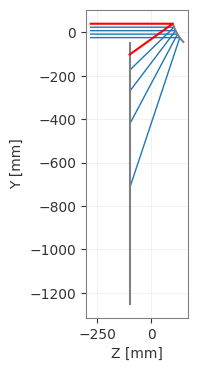

In [130]:
fig, ax = lens.draw(num_rays=6)

ray = lens.trace_generic(Hx=0, Hy=0, Px=0, Py=1, wavelength=0.587)
#rays = lens.trace_generic(Hx=0, Hy=0, Px=0, Py=1, wavelength=0.587)
z_coords = lens.surface_group.z[:,-1]
y_coords = lens.surface_group.y[:,-1]
print(z_coords)
print(y_coords)

ax.plot(z_coords, y_coords, color="red")

#print(ray, rays)
#print(ray.M0)

In [131]:
irradiance = IncoherentIrradiance(
    lens,
    #num_rays=1000_000,  # 1 million rays
    num_rays=1,
    detector_surface=-1,  # image surface
    distribution="uniform",
    res=[1,1280]
)
irradiance.view(normalize=True)
irr_data = irradiance.data
print(irradiance.npix_x)
print(irradiance.npix_y)

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
i = 0
for fblock in irr_data:
    for irr, *_ in fblock:
        irr_mean=be.mean(irr)
        irr_std=be.std(irr)
        irr_max=be.max(irr)
        irr_min=be.min(irr)

        if irr_mean > 0:
            rms_uniformity = irr_std / irr_mean
        else:
            rms_uniformity = 0

        if irr_mean > 0:
            irr_uniformity = (irr_max - irr_min) / irr_mean
        else:
            irr_uniformity = 0

print(irr_mean)
print(irr_uniformity)
print(rms_uniformity)
print(irr_max)
print(irr_min)

4.6552999999999995
10.31082851803321
3.003446412712593
48.0
0.0
